In [2]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.patches as patches 
import os 
import sys 

import warnings

warnings.filterwarnings("ignore")

(1173, 1200)


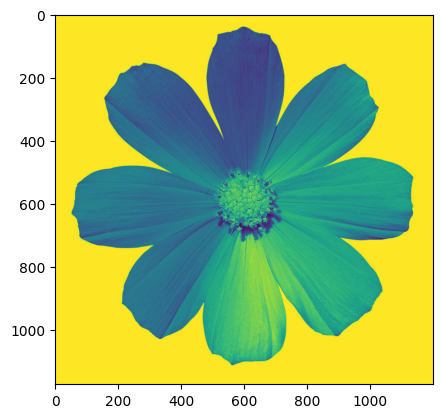

In [3]:
img = cv.imread("petal.jpg", cv.IMREAD_GRAYSCALE) 
print(img.shape) 
plt.imshow(img) 

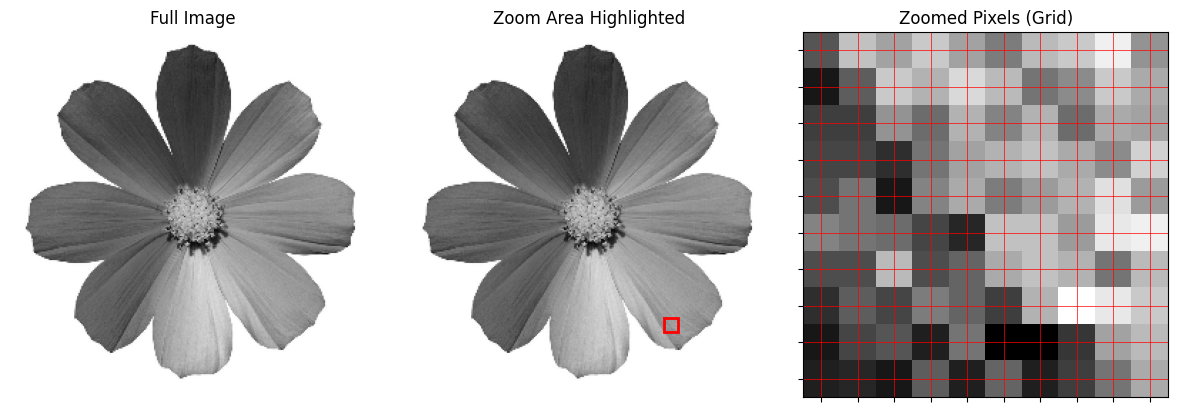

In [4]:
# Resize for clarity (keep it small for demo)
img_resized = cv.resize(img, (256, 256))
# Define the area to zoom into
x_start, y_start = 180, 200
zoom_size = 10
zoomed_img = img_resized[y_start:y_start+zoom_size, x_start:x_start+zoom_size]

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 1. Full grayscale image
axes[0].imshow(img_resized, cmap='gray')
axes[0].set_title("Full Image")
axes[0].axis('off')

# 2. Same image with red rectangle highlighting zoom area
axes[1].imshow(img_resized, cmap='gray')
rect = patches.Rectangle((x_start, y_start), zoom_size, zoom_size,
                         linewidth=2, edgecolor='red', facecolor='none')
axes[1].add_patch(rect)
axes[1].set_title("Zoom Area Highlighted")
axes[1].axis('off')

# 3. Zoomed-in region with pixel grid
axes[2].imshow(zoomed_img, cmap='gray', interpolation='nearest')
axes[2].set_title("Zoomed Pixels (Grid)")
axes[2].set_xticks(np.arange(0, zoom_size, 1))
axes[2].set_yticks(np.arange(0, zoom_size, 1))
axes[2].grid(color='red', linewidth=0.5)
axes[2].set_xticklabels([])
axes[2].set_yticklabels([])

plt.tight_layout()
plt.show()

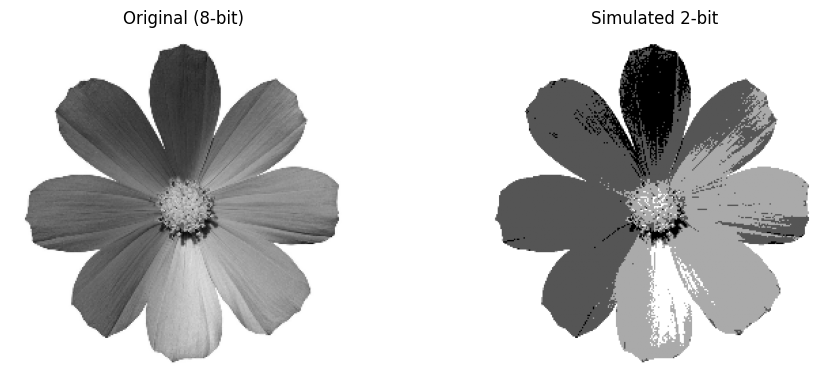

In [5]:
# Quantizing grayscale image to 2-bit
gray_8bit = cv.resize(img, (256, 256))
gray_2bit = np.floor(gray_8bit / 64) * 64  # Only 4 levels: 0, 64, 128, 192

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_8bit, cmap='gray')
plt.title('Original (8-bit)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_2bit.astype(np.uint8), cmap='gray')
plt.title('Simulated 2-bit')
plt.axis('off')
plt.tight_layout()
plt.show()


### RGB (3 channel image)

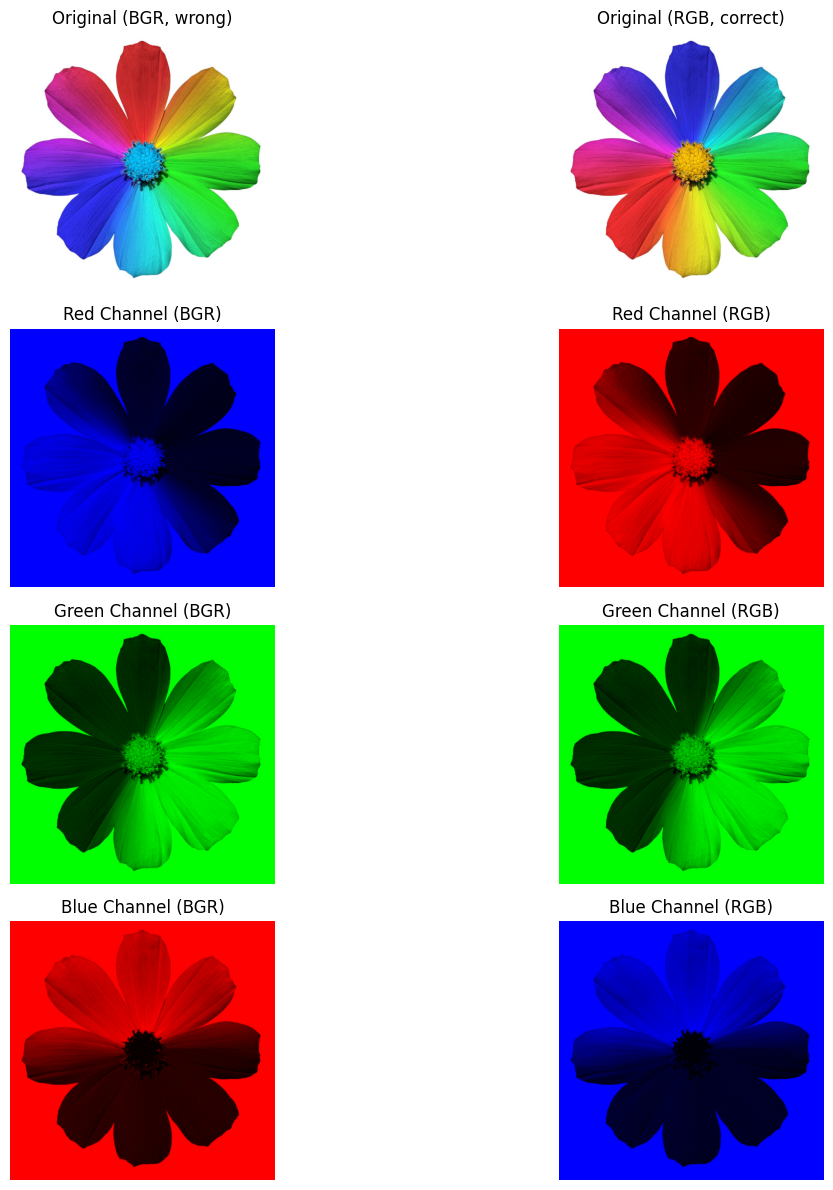

In [13]:
image = cv.imread("petal.jpg") 

# by default, opencv reads an image in BGR format
B, G, R = cv.split(image)

zeros = np.zeros_like(B) 

# in BGR format
red_colored = cv.merge([zeros, zeros, R])
green_colored = cv.merge([zeros, G, zeros])
blue_colored = cv.merge([B, zeros, zeros])

# Prepare RGB-converted versions
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
red_colored_rgb = cv.cvtColor(red_colored, cv.COLOR_BGR2RGB)
green_colored_rgb = cv.cvtColor(green_colored, cv.COLOR_BGR2RGB)
blue_colored_rgb = cv.cvtColor(blue_colored, cv.COLOR_BGR2RGB)

# Plotting
fig, axs = plt.subplots(4, 2, figsize=(14, 12))

axs[0, 0].imshow(image)
axs[0, 0].set_title("Original (BGR, wrong)")
axs[0, 1].imshow(image_rgb)
axs[0, 1].set_title("Original (RGB, correct)")

axs[1, 0].imshow(red_colored)
axs[1, 0].set_title("Red Channel (BGR)")
axs[1, 1].imshow(red_colored_rgb)
axs[1, 1].set_title("Red Channel (RGB)")

axs[2, 0].imshow(green_colored)
axs[2, 0].set_title("Green Channel (BGR)")
axs[2, 1].imshow(green_colored_rgb)
axs[2, 1].set_title("Green Channel (RGB)")

axs[3, 0].imshow(blue_colored)
axs[3, 0].set_title("Blue Channel (BGR)")
axs[3, 1].imshow(blue_colored_rgb)
axs[3, 1].set_title("Blue Channel (RGB)")

# Remove axes
for ax_row in axs:
    for ax in ax_row:
        ax.axis("off")

plt.tight_layout()
plt.show()

### Different color spaces

In [14]:

def visualize_color_space(image_bgr, color_space_name, conversion_code, channel_labels):
    # Convert to target color space
    converted = cv.cvtColor(image_bgr, conversion_code)
    channels = cv.split(converted)
    
    zeros = np.zeros_like(channels[0])

    # Colored representation (in target color space unless RGB)
    colored_images = []
    for i in range(3):
        # Create image with only one channel active
        channel = [zeros]*3
        channel[i] = channels[i]
        merged = cv.merge(channel)
        # Convert to RGB for display (if not already RGB)
        if color_space_name != "RGB":
            merged = cv.cvtColor(merged, cv.COLOR_BGR2RGB)
        colored_images.append(merged)

    # For display
    fig, axs = plt.subplots(3, 2, figsize=(12, 10))
    fig.suptitle(f"{color_space_name} Color Space", fontsize=16)

    for i in range(3):
        axs[i, 0].imshow(channels[i], cmap='gray')
        axs[i, 0].set_title(f"{channel_labels[i]} (Grayscale)")
        axs[i, 0].axis('off')

        axs[i, 1].imshow(colored_images[i])
        axs[i, 1].set_title(f"{channel_labels[i]} (Colored)")
        axs[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

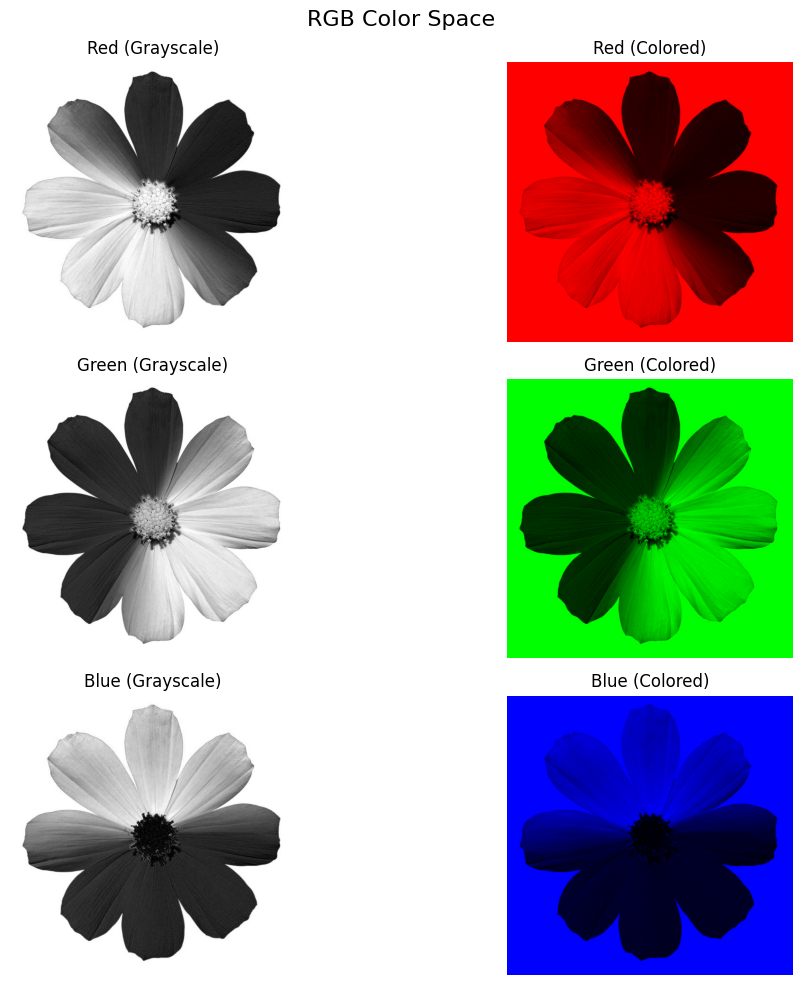

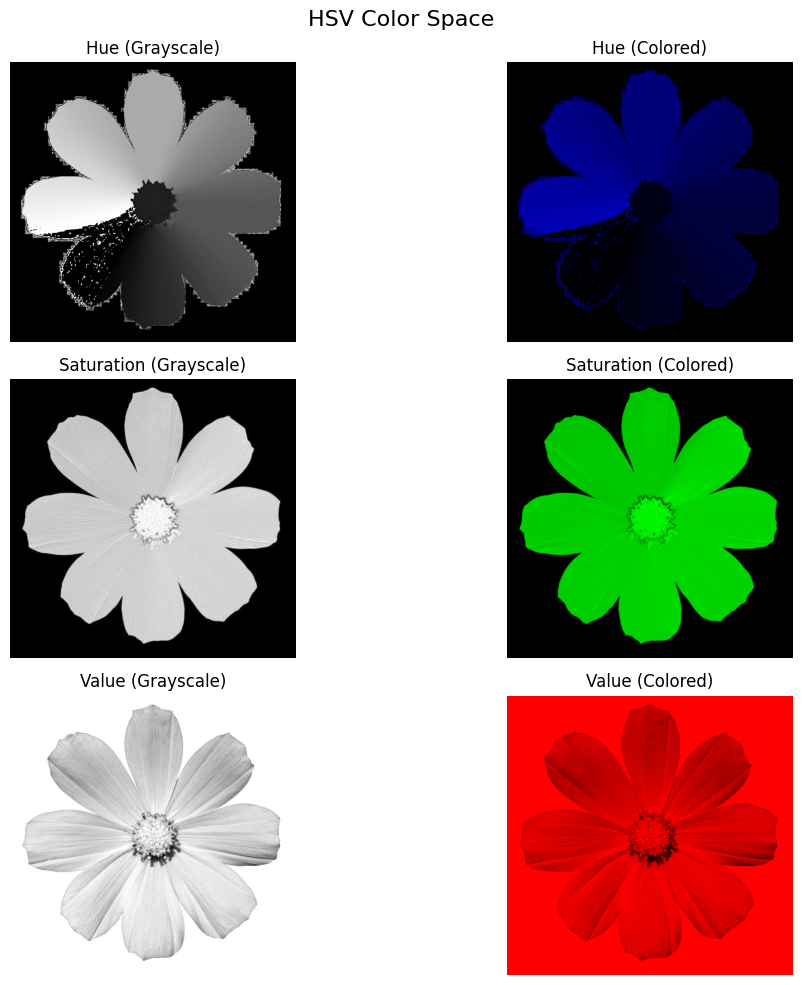

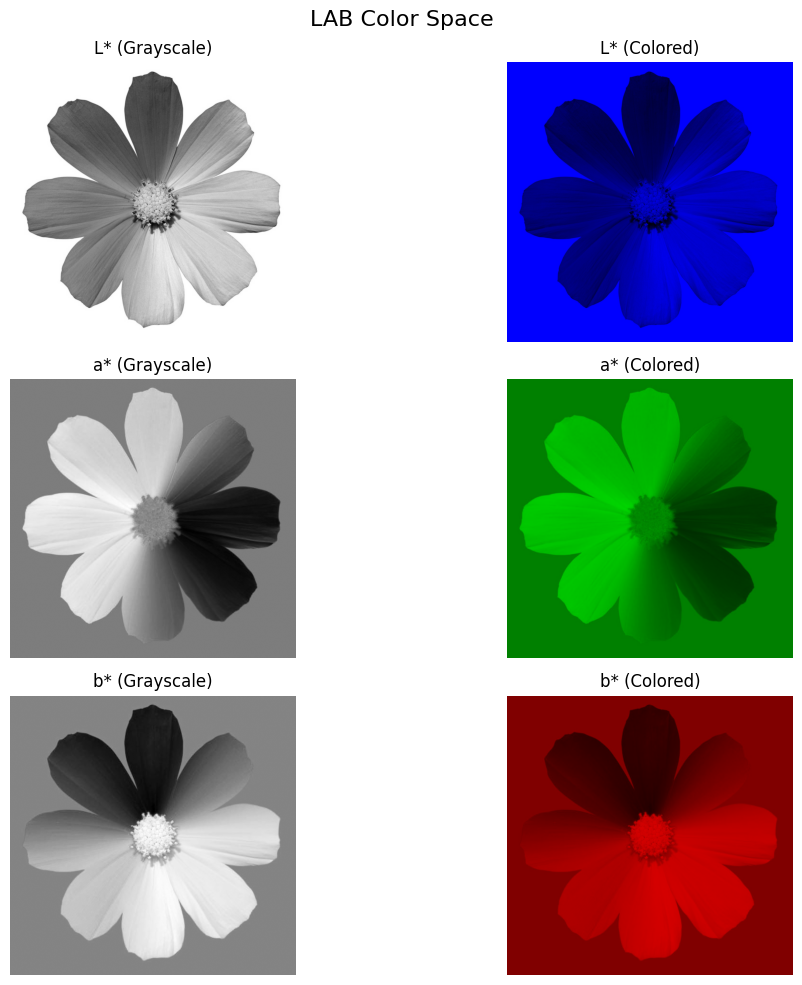

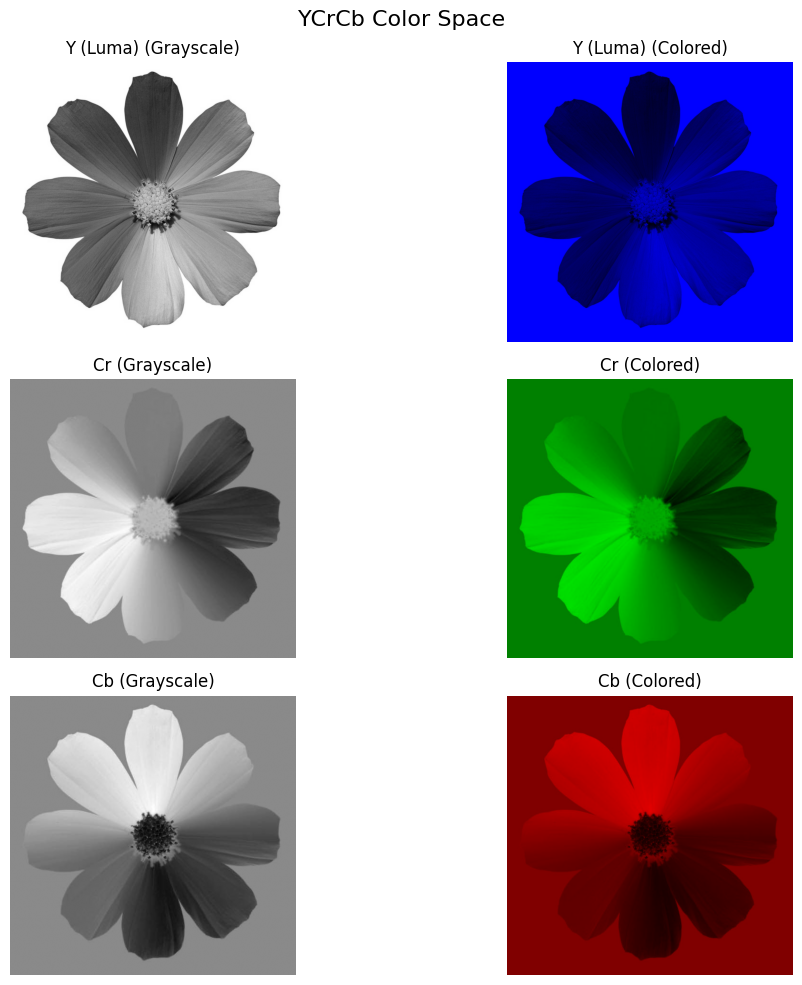

In [15]:
image_bgr = cv.imread("petal.jpg")

# RGB
visualize_color_space(
    image_bgr,
    color_space_name="RGB",
    conversion_code=cv.COLOR_BGR2RGB,
    channel_labels=["Red", "Green", "Blue"]
)

# HSV
visualize_color_space(
    image_bgr,
    color_space_name="HSV",
    conversion_code=cv.COLOR_BGR2HSV,
    channel_labels=["Hue", "Saturation", "Value"]
)

# LAB
visualize_color_space(
    image_bgr,
    color_space_name="LAB",
    conversion_code=cv.COLOR_BGR2Lab,
    channel_labels=["L*", "a*", "b*"]
)

# YCrCb
visualize_color_space(
    image_bgr,
    color_space_name="YCrCb",
    conversion_code=cv.COLOR_BGR2YCrCb,
    channel_labels=["Y (Luma)", "Cr", "Cb"]
)
